## Método de las series de Taylor

**Ejercicio:** Crecimiento de la corriente en un circuito RL. La ecuación que caracteriza el circuito es:

\begin{equation}
E - ir - L \frac{di}{dt} = 0 \\
\implies \frac{di}{dt} = \frac{E}{L} - \frac{R}{L}i
\end{equation}

In [36]:
import numpy as np
import matplotlib.pyplot as plt

R = 0.2
L = 1
E = 0

dI = lambda i0: E/L - R/L*i0
dI2 = lambda i0: -R/L*dI(i0)

def taylor(t0, i0, orden = 1, delta = 0.01):
    # Tiempo desde 0 hasta 50 s con un paso delta
    T = np.arange(0, 50, delta)
    I = np.zeros(len(T))
    
    T[0] = t0
    I[0] = i0
    
    if orden == 1:
        for j in range(len(T)-1):
            i = I[j] + dI(I[j])*(T[j+1]-T[j])
            I[j+1] = i
    elif orden == 2:
            for j in range(len(T)-1):
                i = I[j] + dI(I[j])*(T[j+1]-T[j]) + 0.5*dI2(I[j])*((T[j+1]-T[j]))**2
                I[j+1] = i
    return T,I
        
def main(t0, i0, orden, delta = 0.01):
    T,I = taylor(t0, i0, orden, delta)
    plt.figure(1, figsize=(16,9))
    plt.plot(T,I)
    plt.grid(True)

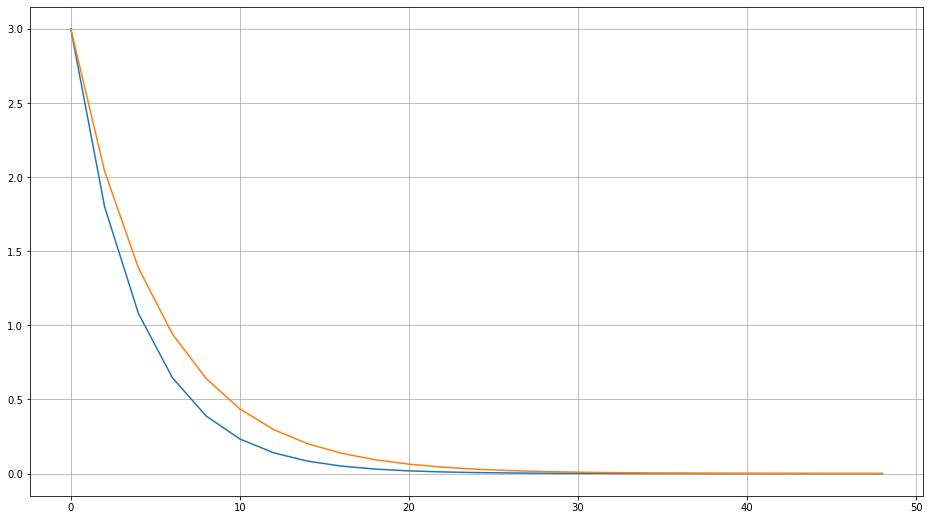

In [41]:
main(0, 3, 1, 2)
main(0, 3, 2, 2)

**Ejercicio:** Circuito RLC. La ecuación del circuito viene dada por:

\begin{equation}
L\frac{di}{dt}+Ri+\frac{1}{C}q = E(t)
\end{equation}

In [45]:
dq = lambda i0: i0
dI = lambda E, L, C, R, i0, Q0: (E - R*i0- Q0/C)/L

def taylor(E, L, C, R, i0, Q0, t0, delta = 0.01):
    # Tiempo desde 0 hasta 50 s con un paso delta
    T = np.arange(0, 50, delta)
    I = np.zeros(len(T))
    Q = np.zeros(len(T))
    
    T[0] = t0
    I[0] = i0
    Q[0] = Q0
    
    for j in range(len(T)-1):
        q = Q[j] + dq(I[j])*(T[j+1]-T[j])
        i = I[j] + dI(E, L, C, R, I[j], Q[j])*(T[j+1]-T[j])
        I[j+1] = i
        Q[j+1] = q
        
    plt.figure(1, figsize=(16,9))
    plt.plot(T,I)
    plt.plot(T,Q)
    plt.grid(True)
    return T,I,Q

(array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.997e+01, 4.998e+01,
        4.999e+01]),
 array([0.00000000e+00, 5.00000000e-03, 9.88750000e-03, ...,
        2.60534996e-14, 2.58947377e-14, 2.57365309e-14]),
 array([0.e+00, 0.e+00, 5.e-05, ..., 5.e-01, 5.e-01, 5.e-01]))

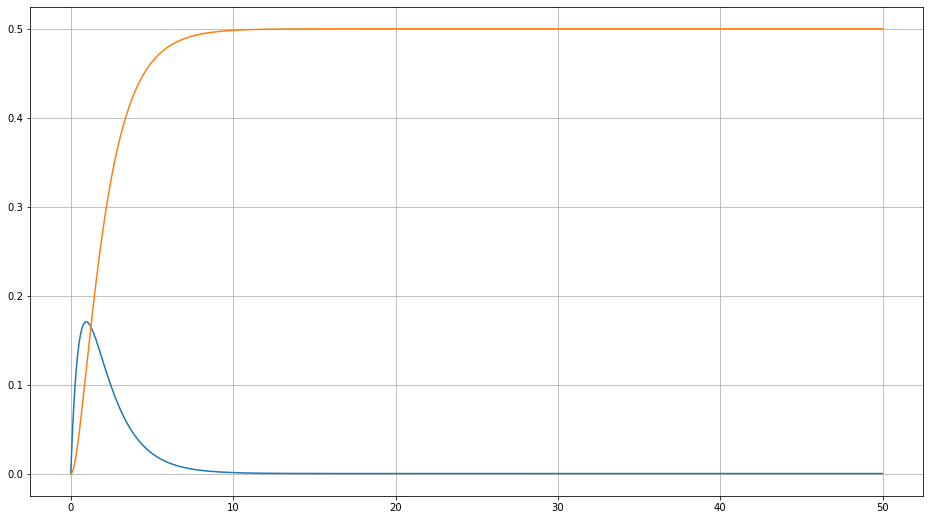

In [46]:
taylor(1, 2, 0.5, 4.5, 0, 0, 0, delta = 0.01)

(array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.997e+01, 4.998e+01,
        4.999e+01]),
 array([0.00000000e+00, 5.00000000e-03, 9.90000000e-03, ...,
        1.06845285e-15, 1.06845285e-15, 1.06845285e-15]),
 array([0.e+00, 0.e+00, 5.e-05, ..., 5.e-01, 5.e-01, 5.e-01]))

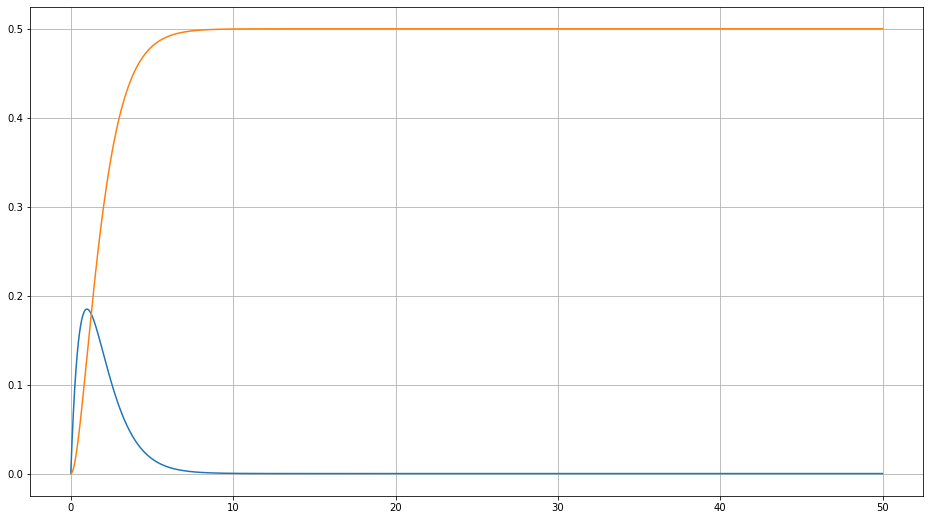

In [47]:
taylor(1, 2, 0.5, 4, 0, 0, 0, delta = 0.01)

(array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.997e+01, 4.998e+01,
        4.999e+01]),
 array([0.00000000e+00, 1.00000000e-02, 1.99500000e-02, ...,
        2.47469248e-06, 2.51778488e-06, 2.56016689e-06]),
 array([0.00000000e+00, 0.00000000e+00, 1.00000000e-04, ...,
        4.99997227e-01, 4.99997251e-01, 4.99997277e-01]))

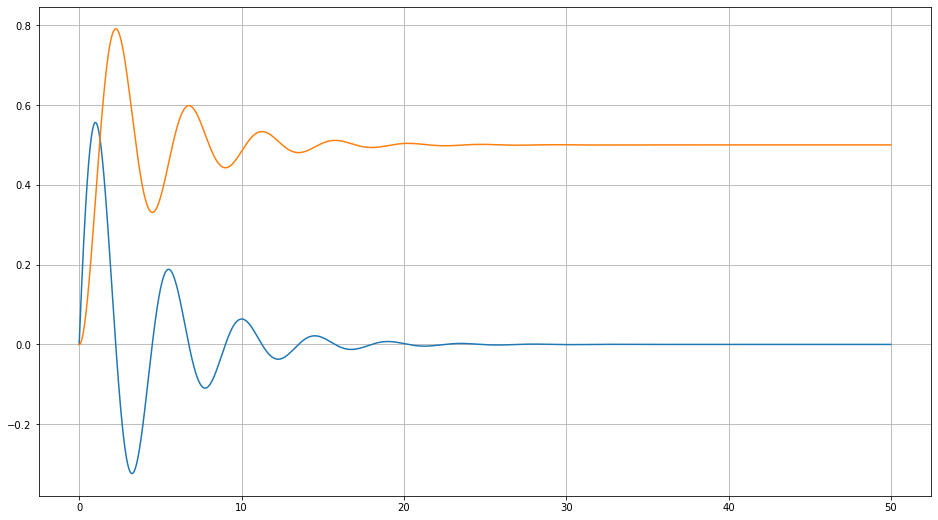

In [48]:
taylor(1, 1, 0.5, 0.5, 0, 0, 0, delta = 0.01)